<p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:250%;text-align:center;border-radius:10px 10px;">Introduction</p>
<p style="font-family:newtimeroman;font-size:120%;color:#444160;">We will explore the dataset of Liver Disease and try to figure out important features and relationships.</p>
<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">Table of Contents</p>   
    
* [1. Importing Libraries](#1)
    
* [2. Read DataSet](#2)
    
* [3. Get Domain Knowledge](#3) 
    
* [4. Cleaning and Formatting of Data](#4) 
    
* [5. Feature Enginnering](#5) 
    
* [6. End](#6)

<a id="1"></a>
# <p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">1.Importing Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")
%matplotlib inline
import gc

import time
import warnings
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 
from sklearn.model_selection import KFold

import numpy as np
import pandas as pd 

import os
import gc
import psutil

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, Normalizer,MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import roc_auc_score,f1_score

from xgboost import XGBClassifier, XGBRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures

from optuna.integration import LightGBMPruningCallback

# get skewed features to impute median instead of mean
from scipy.stats import skew
from sklearn.ensemble import AdaBoostClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from xgboost import XGBRegressor, XGBRFRegressor

import itertools
import optuna
from lightgbm import LGBMClassifier,LGBMRegressor
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostRegressor, CatBoostClassifier

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

<a id="1"></a>
# <p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">2.Read DataSet</p>

In [2]:
data = pd.read_csv("../input/liver-disease-competition/train_dataset.csv")
test = pd.read_csv("../input/liver-disease-competition/test_dataset.csv")

In [3]:
data.head(2)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0


In [4]:
print(data.isna().sum().sum(),test.isna().sum().sum()) # 196 null value

22450 10462


In [5]:
data.shape, test.shape

((6800, 20), (3200, 19))

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             6800 non-null   int64  
 1   N_Days         6800 non-null   int64  
 2   Status         6800 non-null   object 
 3   Drug           4775 non-null   object 
 4   Age            6800 non-null   int64  
 5   Sex            6800 non-null   object 
 6   Ascites        4554 non-null   object 
 7   Hepatomegaly   4373 non-null   object 
 8   Spiders        4210 non-null   object 
 9   Edema          6800 non-null   object 
 10  Bilirubin      6800 non-null   float64
 11  Cholesterol    3699 non-null   float64
 12  Albumin        6800 non-null   float64
 13  Copper         4644 non-null   float64
 14  Alk_Phos       4302 non-null   float64
 15  SGOT           4698 non-null   float64
 16  Tryglicerides  3988 non-null   float64
 17  Platelets      6462 non-null   float64
 18  Prothrom

In [7]:
data.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,6800.000000,6800.000000,6800.000000,6800.000000,3699.000000,6800.000000,4644.000000,4302.000000,4698.000000,3988.000000,6462.000000,6645.000000,6800.000000
mean,6268.608088,1664.055441,22863.223529,1.806147,294.575831,3.036118,68.569121,1802.951464,79.554427,133.857823,293.306097,11.231031,3.157206
std,2405.527133,1332.308135,4671.135682,3.218009,128.085317,0.528164,59.637733,1618.550339,43.433832,47.291444,115.146088,1.123444,0.993059
min,1239.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,4353.750000,537.000000,19416.500000,0.300000,204.000000,2.680000,26.000000,1122.650000,35.290000,114.000000,213.000000,10.500000,2.000000
50%,6599.500000,1443.000000,23367.000000,0.400000,312.000000,3.020000,68.000000,1563.150000,88.505000,128.000000,285.000000,11.100000,4.000000
75%,8299.250000,2519.000000,27125.500000,1.800000,353.000000,3.390000,91.000000,2013.250000,110.672500,141.000000,365.000000,11.700000,4.000000
max,9999.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,340.480000,498.000000,563.000000,18.000000,4.000000


<p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">Object Columns</p>
<p style="font-family:newtimeroman;font-size:120%;color:#444160;">We will now look at Object columns and see how many unique and nan values are there in each category.</p>

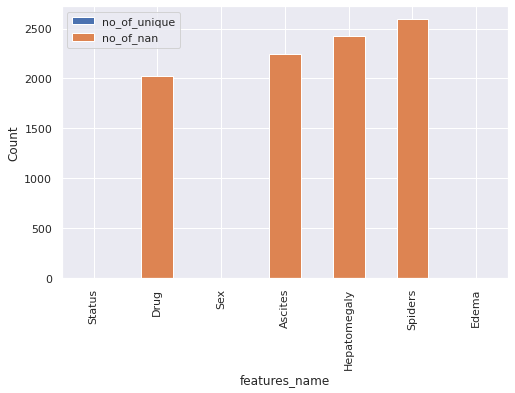

In [8]:
df = data.select_dtypes(['object'])
a = pd.DataFrame([df.columns,  df.nunique(),df.isna().sum()]).T
a.columns =['features_name','no_of_unique','no_of_nan']
a.set_index('features_name',inplace=True)
ax=a.plot(kind='bar',stacked=True,figsize=(8,5))
ax.set_ylabel("Count")
plt.show()

<p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">int/float Columns</p>
<p style="font-family:newtimeroman;font-size:120%;color:#FFFFFF;">We will now look at int/float columns and see how many unique and nan values are there in each category.</p>

Text(0, 0.5, 'Count')

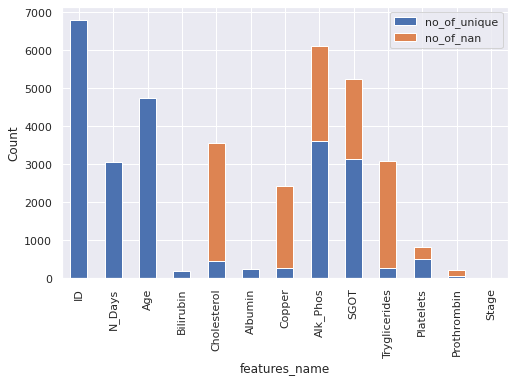

In [9]:
df = data.select_dtypes(exclude=['object'])
a = pd.DataFrame([df.columns,  df.nunique(),df.isna().sum()]).T
a.columns =['features_name','no_of_unique','no_of_nan']
a.set_index('features_name',inplace=True)
ax=a.plot(kind='bar',stacked=True,figsize=(8,5))
ax.set_ylabel("Count")

In [10]:
data.select_dtypes(['object']).columns

Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')

<a id="3"></a>
# <p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">3.Get Domain Knowledge</p>
<p style="font-family:newtimeroman;font-size:120%;color:#444160;">We will fist try to understand data very clearly. This dataset contains Liver Function Test of several patients.
<br>We will understand what each column represents. </p>
<p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">Categorical</p>
<p style="font-family:newtimeroman;font-size:120%;color:#444160;">There are 7 categorical variables <i>'Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'</i><br>
    <b>Status</b> contains information about status of the patient C (censored), CL (censored due to liver tx), or D (death)<br>
    <b>Drug</b> type of the drug. D-penicillamine or placebo<br>
    <b>Sex</b> Gender of patient M/F<br>
    <b>Ascites</b> It is a condition when too much fluid is built in the liver. Y/N<br>
    <b>Hepatomegaly</b> Abnormal Enlargement of Liver. Contains as present or not present (Y/N)<br>
    <b>Spiders</b> Presence of Spiders is a sign of liver diesase. It commonly occurs when person has lot of estrogen in body.(as in case of chronic liver disease or during pregnancy)<br>
    <b>Edema</b> It is a condition in which excess of watery fluid is collected in the tissue of the body.<br></p>
<p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">other</p>
<p style="font-family:newtimeroman;font-size:120%;color:#444160;">There are 11 numerical variables <i> 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'</i><br>
    <b>N_Days</b> number of days between registration and the earlier of death, transplantation, or study analysis time.<br>
    <b>Age</b> age of patient in days<br>
    <b>Bilirubin</b> It is an orange-yellow pigment formed in the liver by the breakdown of haemoglobin and excreted in bile. (Excess of this indicate liver damage) (mg/dl)<br>
    <b>cholesterol</b> A component of sterol type found in most body tissues. High prop in the blood of low density lipoprotein leads to heart disease.<br>
    <b>Albumin</b> Simple protein found in Egg white, Milk and blood.<br>
    <b>Copper</b> Wilson's disease  rare inherited disorder that causes copper to accumulate in liver and brain. Can affect any age people.<br>
    <b>Alk_Phos</b> also known as ALP.<br>
    <b>SGOT</b> Also known as (AST) is one of the two liver enzymes. When liver cells are damazed it leaks into blood.<br>
    <b>Tryglicerides</b> It is natural fat.<br>
    <b>Platelets</b> helps in clotting<br>
    <b>Prothrombin</b> protein present in blood.<br>
    
<p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:30%;text-align:center;border-radius:10px 10px;">""</p>
<p style="font-family:newtimeroman;font-size:120%;color:#444160;">So as we see there are many features in this test which can tell use whether a person has liver issue or not and how severe it is but, In practicality abnormal quantity of any of the above chemical don't guarantee presence of Liver disease. We also need to consider patients whole medical history before coming to any conclusion. On going through few other resources we came to know few more significant aspects of Liver Functional Test:- <br>
<blockquote>
    <p style="font-family:newtimeroman;font-size:120%;color:#444160;"><b>ALP + GGT is used to discriminate between Liver and Bone disease. Both are higher in liver disease. while only ALP is higher in bone disease. ( This can be a very imp feature in our problem).</b></p>
</blockquote>
<blockquote>
    <p style="font-family:newtimeroman;font-size:120%;color:#444160;"><b>AST- ALT ratio or SGOT-SGPT ratio are good indicators of Liver disease.</b></p>
</blockquote>
</p>
<p style="font-family:newtimeroman;font-size:120%;color:#444160;">Source:- https://youtu.be/4BXu7bQb86g <br>
Since SGOT-SGPT is can be an important feature we tried to find it. We have SGOT in our data but we don't have SGPT. We could do one thing like train a model to first make prediction about SGPT given SGOT and other features and then use it to find our actual target <i>Stage</i> but there was chance of data leakage so we didn't move further in this direction.</p>

<a id="4"></a>
# <p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">4.Cleaning and Formatting of Data</p>
<p style="font-family:newtimeroman;font-size:120%;color:#444160;">We will first remove all the nan rows. We see that all the years before 1990 had lot's of nan value, so we will drop them. Next we will restructure our data into Multi Indexing: (year, Item).</p>

In [11]:
def visualize_nulls(data):
    t1 = data.copy()
    t1=t1.fillna("--|--")
    t2 = data.copy()
    t2 = pd.DataFrame(np.ones(t2.shape), columns= t2.columns.tolist())
    t2[t1 == "--|--"] = 0
    plt.figure(figsize=(20,data.shape[1]//3))
    t=sns.heatmap(t2 ,cmap="magma") 
    t.xaxis.set_ticks_position('top') # the rest is the same
    plt.xticks(rotation=90)
    plt.show()

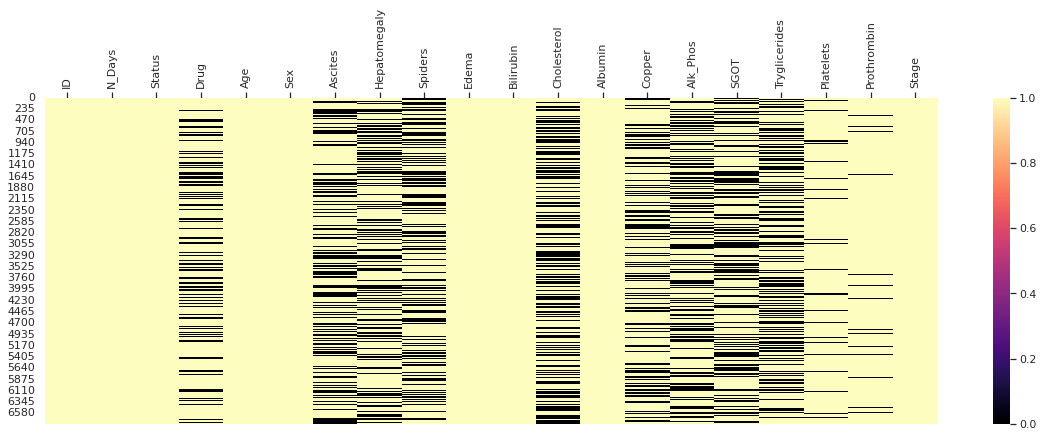

In [12]:
visualize_nulls(data)

In [13]:
data.isnull().sum()/data.shape[0]

ID               0.000000
N_Days           0.000000
Status           0.000000
Drug             0.297794
Age              0.000000
Sex              0.000000
Ascites          0.330294
Hepatomegaly     0.356912
Spiders          0.380882
Edema            0.000000
Bilirubin        0.000000
Cholesterol      0.456029
Albumin          0.000000
Copper           0.317059
Alk_Phos         0.367353
SGOT             0.309118
Tryglicerides    0.413529
Platelets        0.049706
Prothrombin      0.022794
Stage            0.000000
dtype: float64

In [14]:
test.isnull().sum()/test.shape[0]

ID               0.000000
N_Days           0.000000
Status           0.000000
Drug             0.300938
Age              0.000000
Sex              0.000000
Ascites          0.339687
Hepatomegaly     0.344375
Spiders          0.375000
Edema            0.000000
Bilirubin        0.000000
Cholesterol      0.448437
Albumin          0.000000
Copper           0.314375
Alk_Phos         0.365000
SGOT             0.308437
Tryglicerides    0.401875
Platelets        0.051250
Prothrombin      0.020000
dtype: float64

In [15]:
data.drop('Cholesterol',axis=1,inplace=True)  # because almost 44% nan value
test.drop('Cholesterol',axis=1,inplace=True)

In [16]:
data.drop('Tryglicerides',axis=1,inplace=True)  # because almost 40% nan value
test.drop('Tryglicerides',axis=1,inplace=True)

<p style="font-family:newtimeroman;font-size:120%;color:#444160;">Here we look at no of unique values in each column and it's data type.</p>

In [17]:
all_features = list(test.columns)[1:]
print(all_features)

['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Platelets', 'Prothrombin']


In [18]:
df = pd.concat([data[all_features], test[all_features]], axis=0)
list(zip(df.columns, df.dtypes, df.nunique()))

[('N_Days', dtype('int64'), 3607),
 ('Status', dtype('O'), 3),
 ('Drug', dtype('O'), 2),
 ('Age', dtype('int64'), 6445),
 ('Sex', dtype('O'), 2),
 ('Ascites', dtype('O'), 2),
 ('Hepatomegaly', dtype('O'), 2),
 ('Spiders', dtype('O'), 2),
 ('Edema', dtype('O'), 3),
 ('Bilirubin', dtype('float64'), 224),
 ('Albumin', dtype('float64'), 259),
 ('Copper', dtype('float64'), 304),
 ('Alk_Phos', dtype('float64'), 5119),
 ('SGOT', dtype('float64'), 4276),
 ('Platelets', dtype('float64'), 502),
 ('Prothrombin', dtype('float64'), 68)]

<p style="font-family:newtimeroman;font-size:120%;color:#444160;"><b>Target Columns.</b></p>

In [19]:
values = data.Stage.value_counts().values
labels = data.Stage.value_counts().index.tolist()

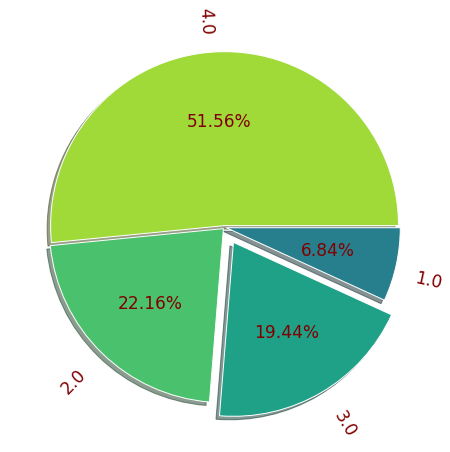

In [20]:
colors = sns.color_palette('viridis_r')[0:5] # It generates list of tuples of (R,G,B) values , we are selecting first 5 tuples.
plt.figure(figsize=(8,8))
plt.pie(x=values, #--------------------------------------> sets value on which to create pie chart
        labels=labels,#----------------------------------> sets label for each piece
        colors=colors,#----------------------------------> sets color for each piece
        autopct='%.02f%%',#------------------------------> sets shows value as percentange  
        explode=[0.01,0.01,0.1,0.01],#--------------> sets value by which corresponding piece will blow up
        rotatelabels=True,#------------------------------> rotates labels in direction of pieces for better viewing
        shadow=True,#------------------------------------> casts shadow on the pieces
        startangle=0,#-----------------------------------> sets the starting angle from where pieces will start anticlock wise.
        textprops={'color':'maroon','fontsize':'17'},#---> sets color and fontsize of the labels and the no/percentage displayed on pieces
        frame=False, #-----------------------------------> frame + center displays pie on coordiante system
        #center = (0.1,0.1)
       )
plt.show()

<p style="font-family:newtimeroman;font-size:120%;color:#444160;"><b>Object Columns.</b></p>

In [21]:
dobj = df.select_dtypes(['object'])
obj_cols= dobj.columns
list(zip(dobj.columns, dobj.dtypes, dobj.nunique()))

[('Status', dtype('O'), 3),
 ('Drug', dtype('O'), 2),
 ('Sex', dtype('O'), 2),
 ('Ascites', dtype('O'), 2),
 ('Hepatomegaly', dtype('O'), 2),
 ('Spiders', dtype('O'), 2),
 ('Edema', dtype('O'), 3)]

In [22]:
for col in obj_cols:
    print(f"{col}:",'mode:',dobj[col].mode()[0],set(dobj[col]))

Status: mode: C {'C', 'CL', 'D'}
Drug: mode: D-penicillamine {nan, 'Placebo', 'D-penicillamine'}
Sex: mode: F {'M', 'F'}
Ascites: mode: N {nan, 'N', 'Y'}
Hepatomegaly: mode: N {nan, 'N', 'Y'}
Spiders: mode: N {nan, 'N', 'Y'}
Edema: mode: N {'N', 'Y', 'S'}


In [23]:
data[obj_cols]= data[obj_cols].fillna(value=data[obj_cols].mode().iloc[0,:])
test[obj_cols]= test[obj_cols].fillna(value=test[obj_cols].mode().iloc[0,:])

<p style="font-family:newtimeroman;font-size:120%;color:#444160;">We see now no of unique in value in each column for train and test set.</p>

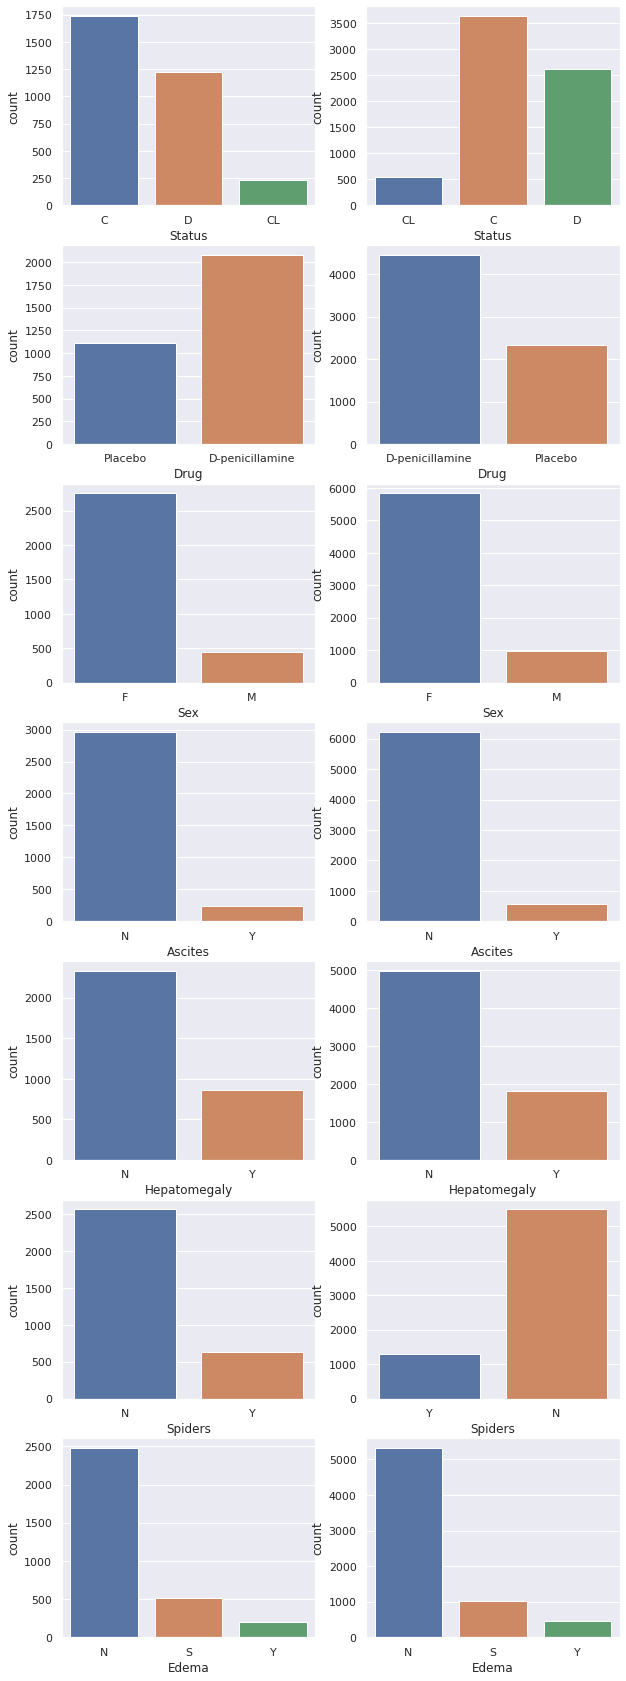

In [24]:
fig,axes = plt.subplots(7,2,figsize=(10,30))
for i,col in enumerate(obj_cols):
    sns.countplot(test[col],ax= axes[i,0])
    sns.countplot(data[col],ax= axes[i,1])
plt.show()
# We see same distribution for train and test set

<p style="font-family:newtimeroman;font-size:120%;color:#444160;"><b>Numerical columns</b></p>

In [25]:
dobj = df.select_dtypes(exclude=['object'])
int_cols = dobj.columns
list(zip(dobj.columns, dobj.dtypes, dobj.nunique()))

[('N_Days', dtype('int64'), 3607),
 ('Age', dtype('int64'), 6445),
 ('Bilirubin', dtype('float64'), 224),
 ('Albumin', dtype('float64'), 259),
 ('Copper', dtype('float64'), 304),
 ('Alk_Phos', dtype('float64'), 5119),
 ('SGOT', dtype('float64'), 4276),
 ('Platelets', dtype('float64'), 502),
 ('Prothrombin', dtype('float64'), 68)]

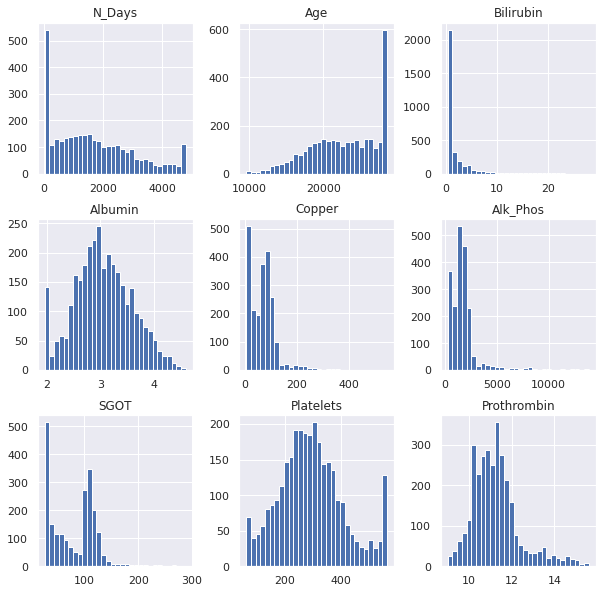

<Figure size 432x288 with 0 Axes>

In [26]:
test[int_cols].hist(figsize=(10,10),bins=30)
plt.show()
plt.tight_layout()

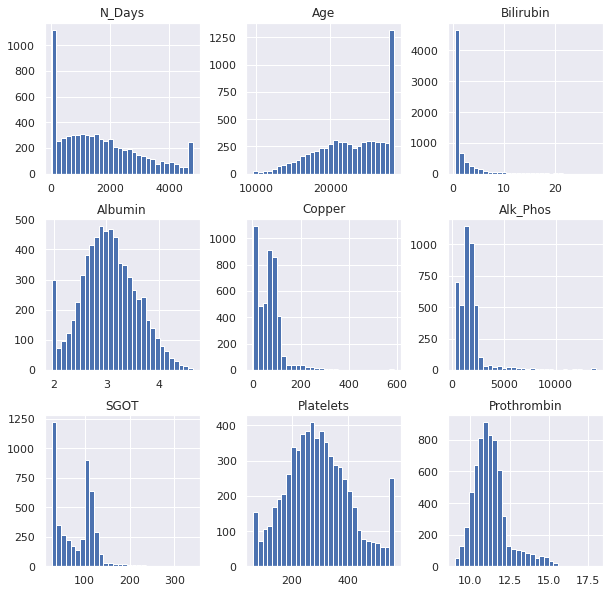

<Figure size 432x288 with 0 Axes>

In [27]:
data[int_cols].hist(figsize=(10,10),bins=30)
plt.show()
plt.tight_layout()

In [28]:
len(int_cols)

9

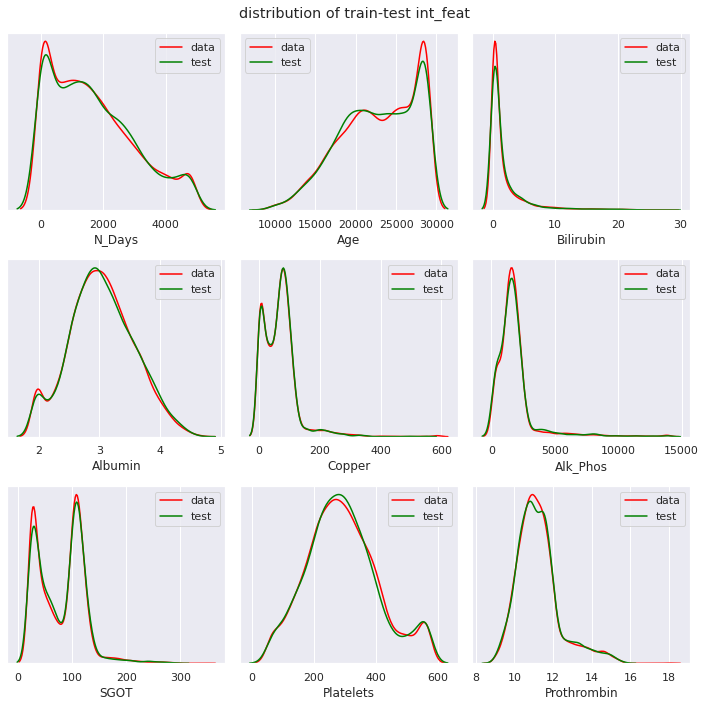

In [29]:
fig, axes = plt.subplots(3,3, figsize=(10,10))
axes = axes.flatten()
for idx, ax in enumerate(axes):
        sns.kdeplot(data[int_cols[idx]], color="red", label="data", ax=ax)
        sns.kdeplot(test[int_cols[idx]],  color="green", label="test", ax=ax)
        ax.get_yaxis().set_visible(False)
        ax.legend()
fig.suptitle("distribution of train-test int_feat")
fig.tight_layout()
plt.show()

<p style="font-family:newtimeroman;font-size:120%;color:#444160;">From above plot we come to conclusion that <i>Alumin</i> and <i>Platelets</i> are normally distributed so we will take mean while for others numerical columns we will take mode.</p>

In [30]:
int_cols1 = ['Albumin','Platelets']
int_cols2 = list(set(int_cols)- set(int_cols1))
display(int_cols1)
display(int_cols2)

['Albumin', 'Platelets']

['Copper', 'Prothrombin', 'Bilirubin', 'N_Days', 'SGOT', 'Age', 'Alk_Phos']

In [31]:
data[int_cols2].mode().iloc[0,:]

Copper             4.00
Prothrombin       10.90
Bilirubin          0.30
N_Days            41.00
SGOT              26.35
Age            28650.00
Alk_Phos         289.00
Name: 0, dtype: float64

In [32]:
data[int_cols1]= data[int_cols1].fillna(value=data[int_cols1].mean())
data[int_cols2]= data[int_cols2].fillna(value=data[int_cols2].mode().iloc[0,:])

test[int_cols1]= test[int_cols1].fillna(value=test[int_cols1].mean())
test[int_cols2]= test[int_cols2].fillna(value=test[int_cols2].mode().iloc[0,:])

In [33]:
test.isna().sum()

ID              0
N_Days          0
Status          0
Drug            0
Age             0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
Bilirubin       0
Albumin         0
Copper          0
Alk_Phos        0
SGOT            0
Platelets       0
Prothrombin     0
dtype: int64

In [34]:
data.isna().sum()

ID              0
N_Days          0
Status          0
Drug            0
Age             0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
Bilirubin       0
Albumin         0
Copper          0
Alk_Phos        0
SGOT            0
Platelets       0
Prothrombin     0
Stage           0
dtype: int64

<p style="font-family:newtimeroman;font-size:120%;color:#444160;">Now we have removed/filled all the nan values. So our data is clean now.</p>

In [35]:
data.shape, test.shape

((6800, 18), (3200, 17))

In [36]:
obj_cols, int_cols

(Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object'),
 Index(['N_Days', 'Age', 'Bilirubin', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
        'Platelets', 'Prothrombin'],
       dtype='object'))

In [37]:
data.head(2)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,Alk_Phos,SGOT,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,2.96,84.0,1500.8,99.43,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,N,N,N,N,0.3,2.96,4.0,1835.4,26.35,308.0,10.8,1.0


<a id="5"></a>
# <p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">5.Feature Engineering</p>
<p style="font-family:newtimeroman;font-size:120%;color:#444160;">We also notice that there are certain ranges in which presence of a substance is considered normal and our of which it is considerd abnormal. So we will create new features based on this idea.</p>

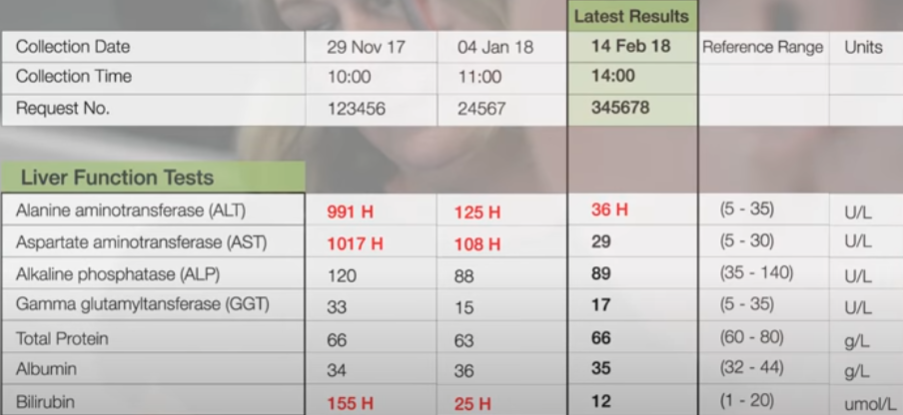
<p style="font-family:newtimeroman;font-size:120%;color:#444160;">
    <b>Biluribin</b> 1-20 umol/L <br>
    <b> Albumin</b> 32-44 g/L <br>
    <b>Alk_Phos</b> 35-140 U/L<br>
    <b>SGOT</b> 5-30 U/L <br>
So first we need to make few unit conversion.<br>
mg/dl to umol/L  (*88.4)<br>
g/dl to g/L (*10)<br>
U/dl to U/L (*1000)<br>
    <b>Bilirubin:-</b></p>

<AxesSubplot:xlabel='Bilirubin', ylabel='Density'>

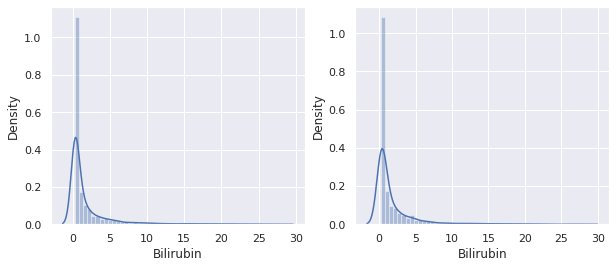

In [38]:
fig,axes = plt.subplots(1,2,figsize=(10,4))
sns.distplot(data['Bilirubin'], ax= axes[0])
sns.distplot(test['Bilirubin'], ax= axes[1])
#ax.set_yscale('log')

In [39]:
data['Bilirubin_modified'] = data['Bilirubin'] * 88.4
test['Bilirubin_modified'] = test['Bilirubin'] * 88.4

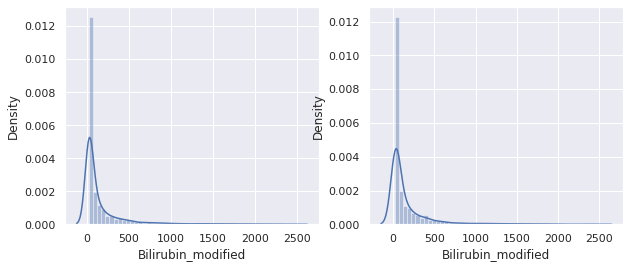

In [40]:
fig,axes = plt.subplots(1,2,figsize=(10,4))
sns.distplot(data['Bilirubin_modified'], ax= axes[0])
sns.distplot(test['Bilirubin_modified'], ax= axes[1])
ax.set_yscale('log')

In [41]:
display(data[data['Bilirubin_modified'] <= 20]) # so all have abnormal bilirubin
display(test[test['Bilirubin_modified'] <= 20]) # 

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,Alk_Phos,SGOT,Platelets,Prothrombin,Stage,Bilirubin_modified


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,Alk_Phos,SGOT,Platelets,Prothrombin,Bilirubin_modified


In [42]:
data['normal_Bilirubin'] = ((data.Bilirubin_modified <= 20) & (1 <= data.Bilirubin_modified)).astype(int)
test['normal_Bilirubin'] = ((test.Bilirubin_modified <= 20) & (1 <= test.Bilirubin_modified)).astype(int)

<p style="font-family:newtimeroman;font-size:120%;color:#444160;"><b>Albumin</b></p>

<AxesSubplot:xlabel='Albumin', ylabel='Density'>

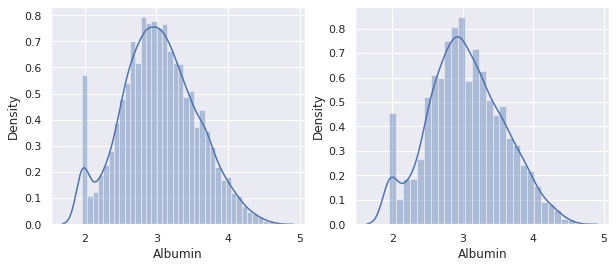

In [43]:
fig,axes = plt.subplots(1,2,figsize=(10,4))
sns.distplot(data['Albumin'], ax= axes[0])
sns.distplot(test['Albumin'], ax= axes[1])
#ax.set_yscale('log')

In [44]:
data['Albumin_modified'] = data['Albumin']* 10
test['Albumin_modified'] = test['Albumin']* 10

<AxesSubplot:xlabel='Albumin_modified', ylabel='Density'>

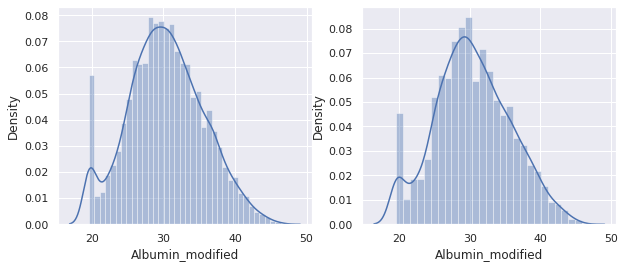

In [45]:
fig,axes = plt.subplots(1,2,figsize=(10,4))
sns.distplot(data['Albumin_modified'], ax= axes[0])
sns.distplot(test['Albumin_modified'], ax= axes[1])
#ax.set_yscale('log')

In [46]:
data.shape, test.shape

((6800, 21), (3200, 20))

In [47]:
display(data[(data['Albumin_modified'] <= 44) & (data['Albumin_modified'] >= 32 )].shape) # so some have abnormal Albumin
display(test[(test['Albumin_modified'] <= 44) & (test['Albumin_modified'] >= 32 )].shape)

(2501, 21)

(1186, 20)

In [48]:
data['normal_Albumin'] = ((data.Albumin_modified <= 44) &  (data.Albumin_modified >= 32)).astype(int)
test['normal_Albumin'] = ((test.Albumin_modified <= 44) &  (test.Albumin_modified >= 32)).astype(int)

<p style="font-family:newtimeroman;font-size:120%;color:#444160;"><b>Alk_Phos</b></p>

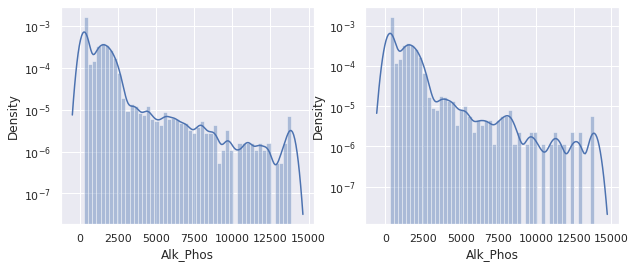

In [49]:
fig,axes = plt.subplots(1,2,figsize=(10,4))
sns.distplot(data['Alk_Phos'], ax= axes[0])
sns.distplot(test['Alk_Phos'], ax= axes[1])
axes[0].set_yscale('log')
axes[1].set_yscale('log')

In [50]:
data['normal_Alk_Phos']  =  ((data['Alk_Phos'] <= 140 ) & (data['Alk_Phos'] >= 35 )).astype(int)
test['normal_Alk_Phos']  =  ((test['Alk_Phos'] <= 140 ) & (test['Alk_Phos'] >= 35 )).astype(int)

In [51]:
data['normal_Alk_Phos'].sum(), test['normal_Alk_Phos'].sum()  # all 0

(0, 0)

<p style="font-family:newtimeroman;font-size:120%;color:#444160;"><b>SGOT</b></p>

<AxesSubplot:xlabel='SGOT', ylabel='Density'>

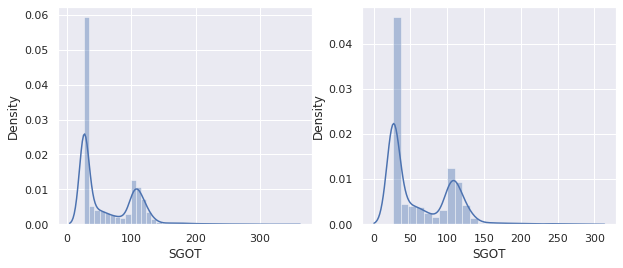

In [52]:
fig,axes = plt.subplots(1,2,figsize=(10,4))
sns.distplot(data['SGOT'], ax= axes[0])
sns.distplot(test['SGOT'], ax= axes[1])
#axes[0].set_yscale('log')
#axes[1].set_yscale('log')

In [53]:
data['SGOT_modified'] = data['SGOT']* 1000
test['SGOT_modified'] = test['SGOT']* 1000

<AxesSubplot:xlabel='SGOT_modified', ylabel='Density'>

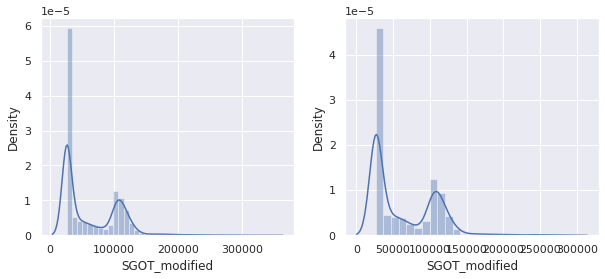

In [54]:
fig,axes = plt.subplots(1,2,figsize=(10,4))
sns.distplot(data['SGOT_modified'], ax= axes[0])
sns.distplot(test['SGOT_modified'], ax= axes[1])
#axes[0].set_yscale('log')
#axes[1].set_yscale('log')

In [55]:
data['normal_SGOT']  =  ((data['SGOT_modified'] <= 30 ) & (data['SGOT_modified'] >= 5 )).astype(int)
test['normal_SGOT']  =  ((test['SGOT_modified'] <= 30 ) & (test['SGOT_modified'] >= 5 )).astype(int)

In [56]:
data['normal_SGOT'].sum(), test['normal_SGOT'].sum()  # all 0

(0, 0)

<p style="font-family:newtimeroman;font-size:120%;color:#444160;"><b>Now we will drop duplicate columns</b></p>

In [57]:
# Let's drop duplicates
duplicate_cols = ['Bilirubin','Albumin','SGOT'] # we didn't create Alk_Phos_modified
test.drop(duplicate_cols, axis=1,inplace=True)
data.drop(duplicate_cols, axis=1,inplace=True)

In [58]:
test.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Copper', 'Alk_Phos', 'Platelets',
       'Prothrombin', 'Bilirubin_modified', 'normal_Bilirubin',
       'Albumin_modified', 'normal_Albumin', 'normal_Alk_Phos',
       'SGOT_modified', 'normal_SGOT'],
      dtype='object')

In [59]:
data.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Copper', 'Alk_Phos', 'Platelets',
       'Prothrombin', 'Stage', 'Bilirubin_modified', 'normal_Bilirubin',
       'Albumin_modified', 'normal_Albumin', 'normal_Alk_Phos',
       'SGOT_modified', 'normal_SGOT'],
      dtype='object')

<p style="font-family:newtimeroman;font-size:120%;color:#444160;"><b>We will now look at correlation with target i.e 'Stage'.</b></p>

In [60]:
data.corr()['Stage']

ID                   -0.186569
N_Days                0.004066
Age                  -0.001854
Copper                0.011345
Alk_Phos             -0.001527
Platelets            -0.021046
Prothrombin           0.007114
Stage                 1.000000
Bilirubin_modified   -0.010225
normal_Bilirubin           NaN
Albumin_modified     -0.015126
normal_Albumin       -0.010802
normal_Alk_Phos            NaN
SGOT_modified        -0.020998
normal_SGOT                NaN
Name: Stage, dtype: float64

In [61]:
useful_cols = test.drop("ID",axis=1).columns
useful_cols

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Copper', 'Alk_Phos', 'Platelets', 'Prothrombin',
       'Bilirubin_modified', 'normal_Bilirubin', 'Albumin_modified',
       'normal_Albumin', 'normal_Alk_Phos', 'SGOT_modified', 'normal_SGOT'],
      dtype='object')

<AxesSubplot:>

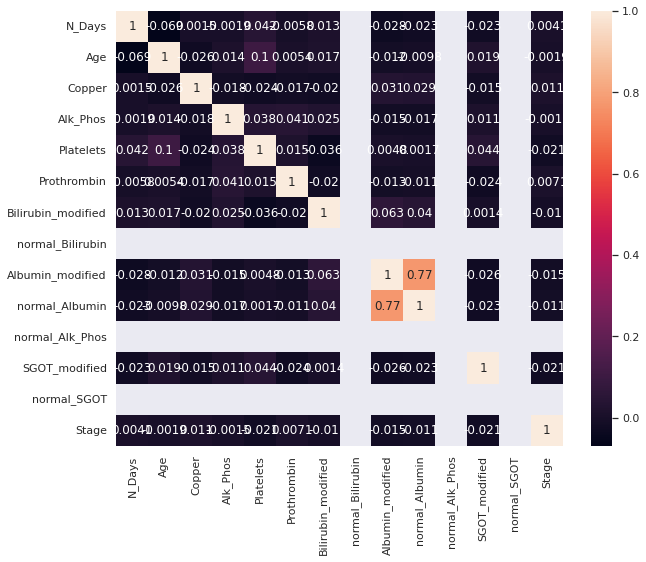

In [62]:
corr_table= data[list(useful_cols)+ ['Stage']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_table, annot= True )

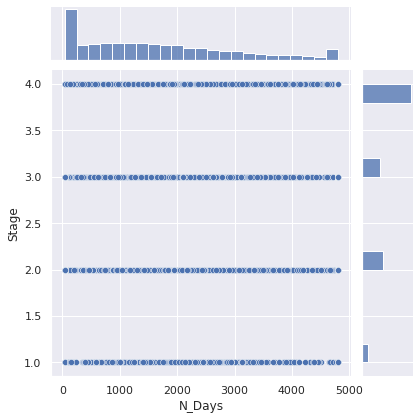

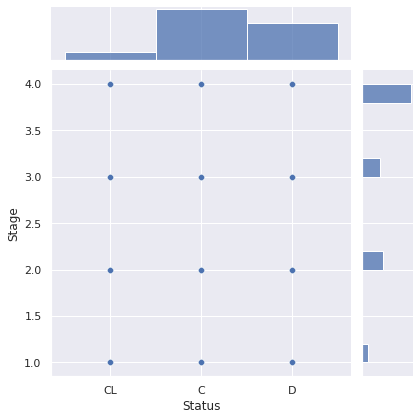

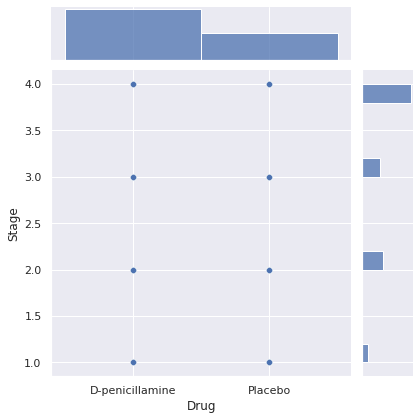

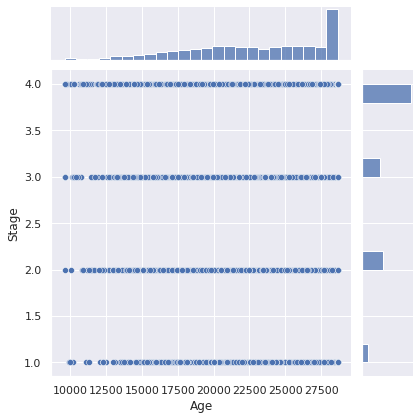

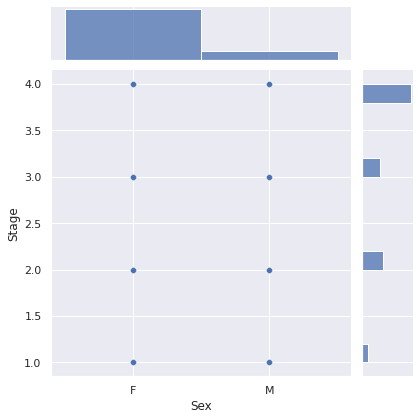

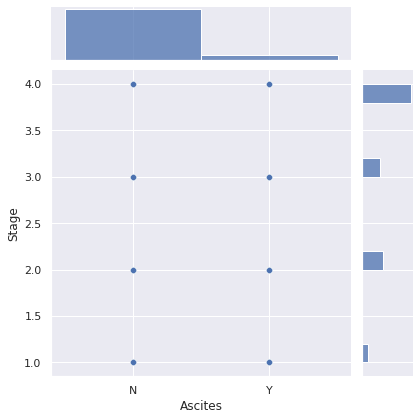

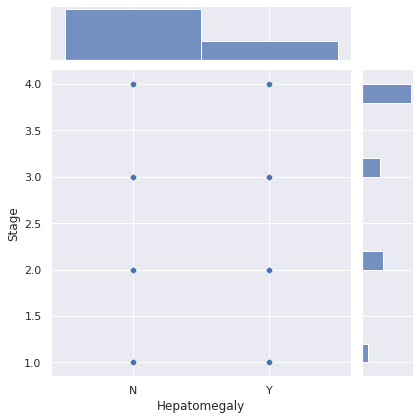

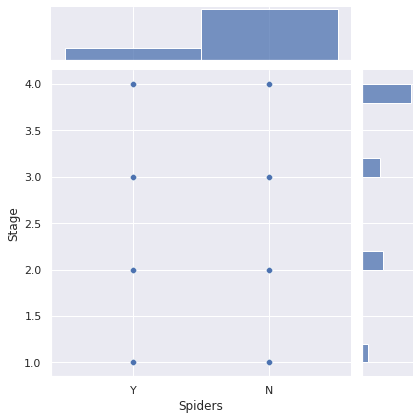

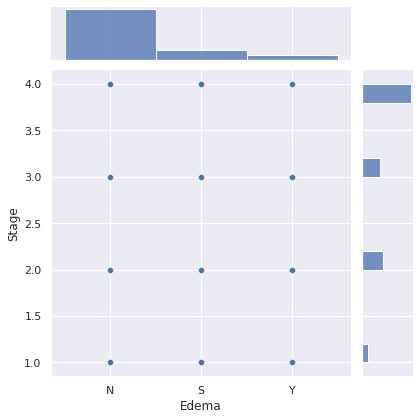

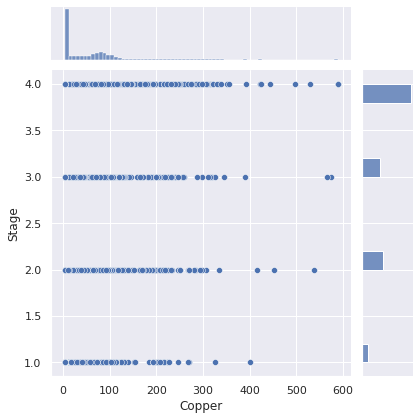

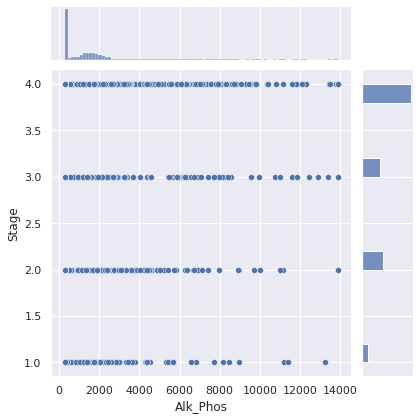

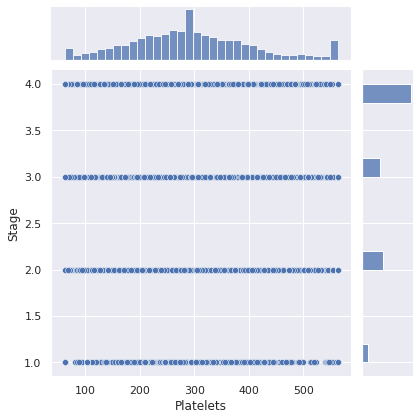

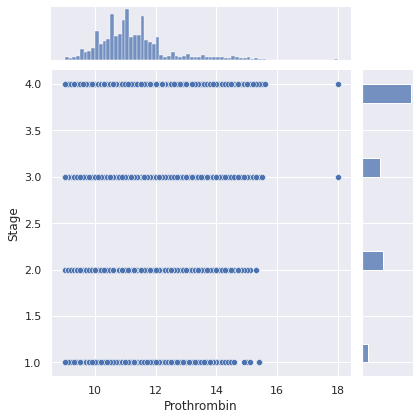

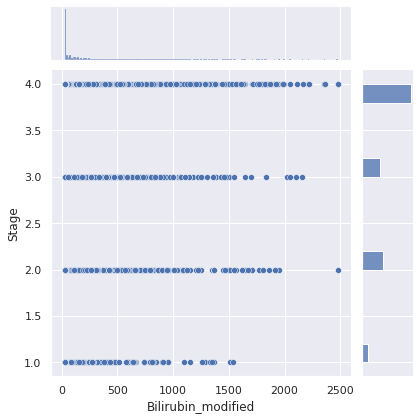

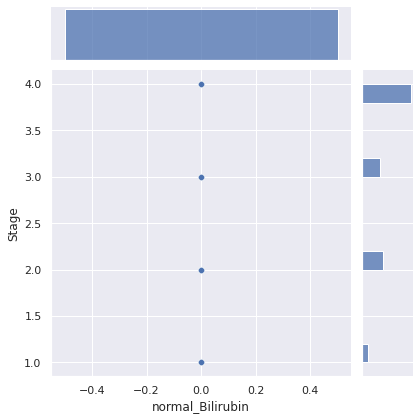

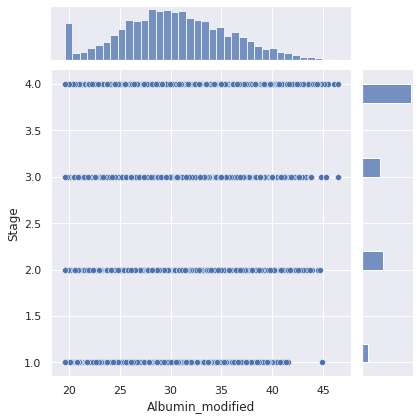

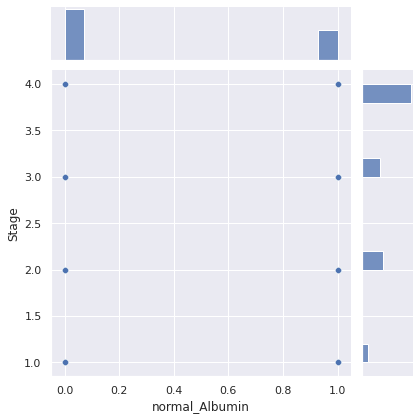

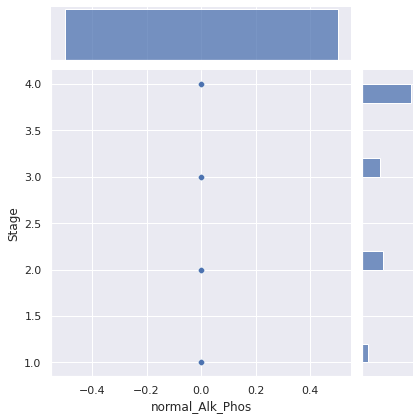

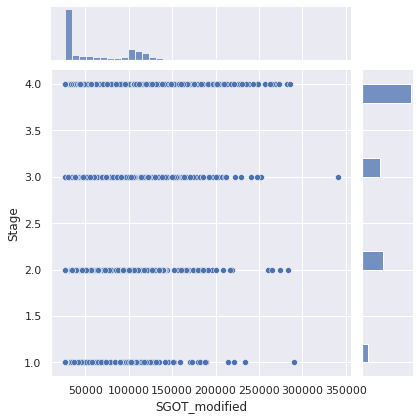

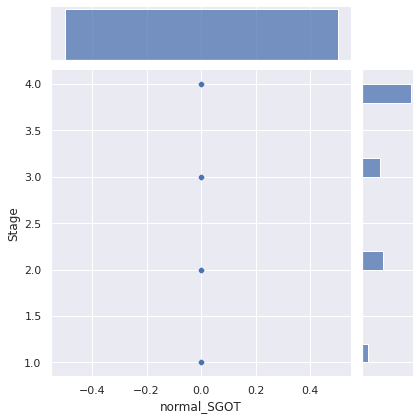

In [63]:
for i,col in enumerate(useful_cols):
    sns.jointplot(data[col],data.Stage)

<p style="font-family:newtimeroman;font-size:120%;color:#444160;"><b>So target columns 'Stage' is equally distributed with all features.</b></p>

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6800 non-null   int64  
 1   N_Days              6800 non-null   int64  
 2   Status              6800 non-null   object 
 3   Drug                6800 non-null   object 
 4   Age                 6800 non-null   int64  
 5   Sex                 6800 non-null   object 
 6   Ascites             6800 non-null   object 
 7   Hepatomegaly        6800 non-null   object 
 8   Spiders             6800 non-null   object 
 9   Edema               6800 non-null   object 
 10  Copper              6800 non-null   float64
 11  Alk_Phos            6800 non-null   float64
 12  Platelets           6800 non-null   float64
 13  Prothrombin         6800 non-null   float64
 14  Stage               6800 non-null   float64
 15  Bilirubin_modified  6800 non-null   float64
 16  normal

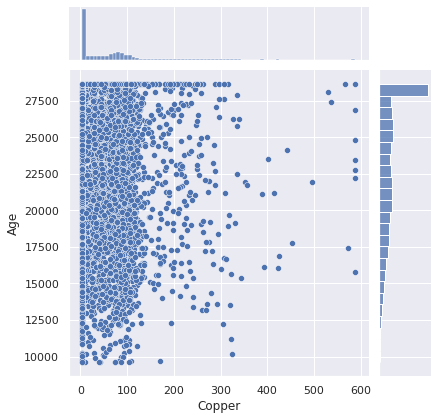

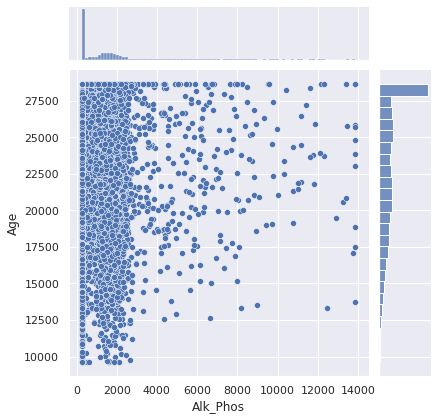

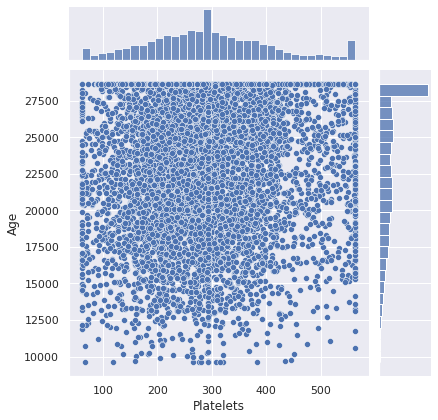

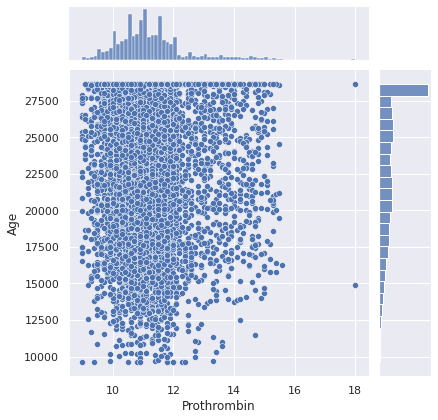

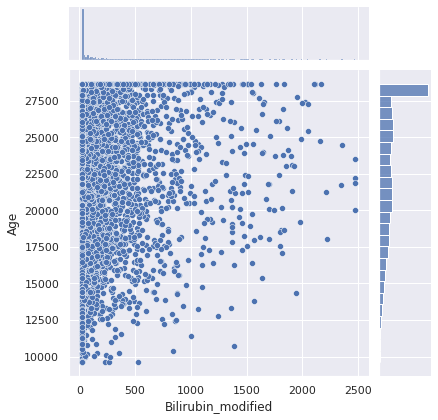

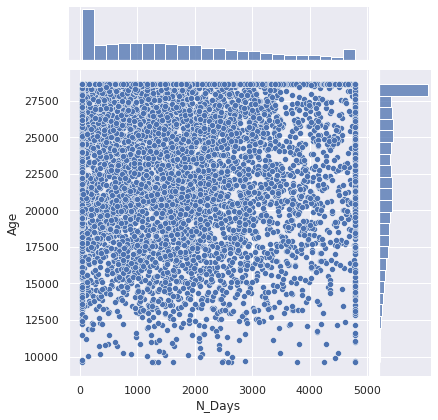

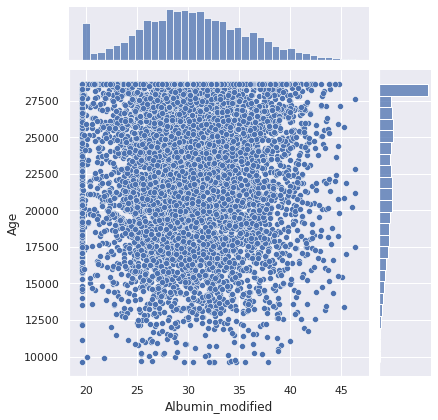

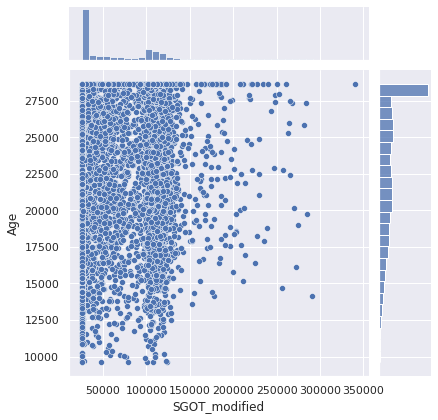

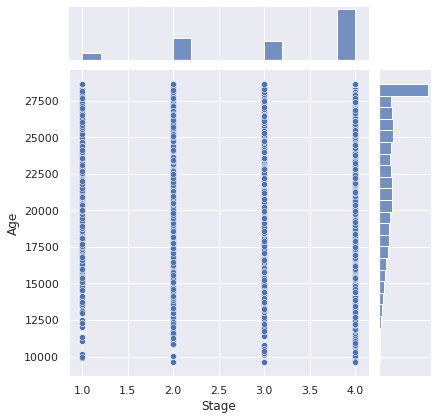

In [65]:
int_cols_new = ['Copper', 'Alk_Phos', 'Platelets', 'Prothrombin', 'Bilirubin_modified', 'N_Days', 'Albumin_modified', 'SGOT_modified']
for i,col in enumerate(list(int_cols_new)+ ['Stage']):
    #sns.lmplot(x=col,y='Age', data=train)
    sns.jointplot(data[col],data.Age)

In [66]:
t = test.select_dtypes(['object'])
obj_cols = t.columns
list(zip( t.columns, t.nunique()))

[('Status', 3),
 ('Drug', 2),
 ('Sex', 2),
 ('Ascites', 2),
 ('Hepatomegaly', 2),
 ('Spiders', 2),
 ('Edema', 3)]

In [67]:
data['isTrain'] = 1
test['isTrain'] = 0

In [68]:
df = pd.concat([data,test])
df.head(2)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Prothrombin,Stage,Bilirubin_modified,normal_Bilirubin,Albumin_modified,normal_Albumin,normal_Alk_Phos,SGOT_modified,normal_SGOT,isTrain
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,...,10.2,4.0,26.52,0,29.6,0,0,99430.0,0,1
1,7326,41,C,D-penicillamine,22880,F,N,N,N,N,...,10.8,1.0,26.52,0,29.6,0,0,26350.0,0,1


<p style="font-family:newtimeroman;font-size:120%;color:#444160;"><b>Binning of Age.</b></p>

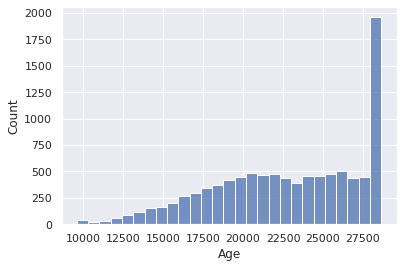

In [69]:
ax=sns.histplot(df.Age)

In [70]:
df['Age_bins']= pd.cut(df.Age.astype(int), 5)

In [71]:
df.head(2)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Stage,Bilirubin_modified,normal_Bilirubin,Albumin_modified,normal_Albumin,normal_Alk_Phos,SGOT_modified,normal_SGOT,isTrain,Age_bins
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,...,4.0,26.52,0,29.6,0,0,99430.0,0,1,"(17218.8, 21029.2]"
1,7326,41,C,D-penicillamine,22880,F,N,N,N,N,...,1.0,26.52,0,29.6,0,0,26350.0,0,1,"(21029.2, 24839.6]"


In [72]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label = LabelEncoder()
df['Age_bins']=label.fit_transform(df['Age_bins'])

In [73]:
df.head(2)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Stage,Bilirubin_modified,normal_Bilirubin,Albumin_modified,normal_Albumin,normal_Alk_Phos,SGOT_modified,normal_SGOT,isTrain,Age_bins
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,...,4.0,26.52,0,29.6,0,0,99430.0,0,1,2
1,7326,41,C,D-penicillamine,22880,F,N,N,N,N,...,1.0,26.52,0,29.6,0,0,26350.0,0,1,3


## binning is over.

In [74]:
obj_cols

Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')

In [75]:
df= pd.get_dummies(data= df,columns=obj_cols,drop_first= True)
df.columns

Index(['ID', 'N_Days', 'Age', 'Copper', 'Alk_Phos', 'Platelets', 'Prothrombin',
       'Stage', 'Bilirubin_modified', 'normal_Bilirubin', 'Albumin_modified',
       'normal_Albumin', 'normal_Alk_Phos', 'SGOT_modified', 'normal_SGOT',
       'isTrain', 'Age_bins', 'Status_CL', 'Status_D', 'Drug_Placebo', 'Sex_M',
       'Ascites_Y', 'Hepatomegaly_Y', 'Spiders_Y', 'Edema_S', 'Edema_Y'],
      dtype='object')

In [76]:
data = df[df.isTrain == 1]
test = df[df.isTrain == 0]

data.drop('isTrain', axis= 1,inplace=True)
test.drop(['isTrain','Stage'], axis=1, inplace=True)

In [77]:
data.columns,test.columns, len(data.columns),len(test.columns)

(Index(['ID', 'N_Days', 'Age', 'Copper', 'Alk_Phos', 'Platelets', 'Prothrombin',
        'Stage', 'Bilirubin_modified', 'normal_Bilirubin', 'Albumin_modified',
        'normal_Albumin', 'normal_Alk_Phos', 'SGOT_modified', 'normal_SGOT',
        'Age_bins', 'Status_CL', 'Status_D', 'Drug_Placebo', 'Sex_M',
        'Ascites_Y', 'Hepatomegaly_Y', 'Spiders_Y', 'Edema_S', 'Edema_Y'],
       dtype='object'),
 Index(['ID', 'N_Days', 'Age', 'Copper', 'Alk_Phos', 'Platelets', 'Prothrombin',
        'Bilirubin_modified', 'normal_Bilirubin', 'Albumin_modified',
        'normal_Albumin', 'normal_Alk_Phos', 'SGOT_modified', 'normal_SGOT',
        'Age_bins', 'Status_CL', 'Status_D', 'Drug_Placebo', 'Sex_M',
        'Ascites_Y', 'Hepatomegaly_Y', 'Spiders_Y', 'Edema_S', 'Edema_Y'],
       dtype='object'),
 25,
 24)

## All the EDA is over now we run all this in single code cell.

In [78]:
#sample = pd.read_csv("../input/tabular-playground-series-feb-2022/sample_submission.csv")
train  = pd.read_csv("../input/liver-disease-competition/train_dataset.csv")
test = pd.read_csv("../input/liver-disease-competition/test_dataset.csv")

In [79]:
train.drop('Cholesterol',axis=1,inplace=True)  # because almost 44% nan value
test.drop('Cholesterol',axis=1,inplace=True)

train.drop('Tryglicerides',axis=1,inplace=True)  # because almost 40% nan value
test.drop('Tryglicerides',axis=1,inplace=True)

all_features = list(test.columns)[1:]

df = pd.concat([train[all_features], test[all_features]], axis=0)
dobj = df.select_dtypes(['object'])
obj_cols= dobj.columns

train[obj_cols]= train[obj_cols].fillna(value=train[obj_cols].mode().iloc[0,:])
test[obj_cols]= test[obj_cols].fillna(value=test[obj_cols].mode().iloc[0,:])

dobj = df.select_dtypes(exclude=['object'])
int_cols = dobj.columns

int_cols1 = ['Albumin','Platelets']
int_cols2 = list(set(int_cols)- set(int_cols1))

train[int_cols1]= train[int_cols1].fillna(value=train[int_cols1].mean())
train[int_cols2]= train[int_cols2].fillna(value=train[int_cols2].mode().iloc[0,:])

test[int_cols1]= test[int_cols1].fillna(value=test[int_cols1].mean())
test[int_cols2]= test[int_cols2].fillna(value=test[int_cols2].mode().iloc[0,:])

train['Bilirubin_modified'] = train['Bilirubin'] * 88.4
test['Bilirubin_modified'] = test['Bilirubin'] * 88.4

train['normal_Bilirubin'] = ((train.Bilirubin_modified <= 20) & (1 <= train.Bilirubin_modified)).astype(int)
test['normal_Bilirubin'] = ((test.Bilirubin_modified <= 20) & (1 <= test.Bilirubin_modified)).astype(int)

train['Albumin_modified'] = train['Albumin']* 10
test['Albumin_modified'] = test['Albumin']* 10

train['normal_Albumin'] = ((train.Albumin_modified <= 44) &  (train.Albumin_modified >= 32)).astype(int)
test['normal_Albumin'] = ((test.Albumin_modified <= 44) &  (test.Albumin_modified >= 32)).astype(int)

train['normal_Alk_Phos']  =  ((train['Alk_Phos'] <= 140 ) & (train['Alk_Phos'] >= 35 )).astype(int)
test['normal_Alk_Phos']  =  ((test['Alk_Phos'] <= 140 ) & (test['Alk_Phos'] >= 35 )).astype(int)

train['SGOT_modified'] = train['SGOT']* 1000
test['SGOT_modified'] = test['SGOT']* 1000

train['normal_SGOT']  =  ((train['SGOT_modified'] <= 30 ) & (train['SGOT_modified'] >= 5 )).astype(int)
test['normal_SGOT']  =  ((test['SGOT_modified'] <= 30 ) & (test['SGOT_modified'] >= 5 )).astype(int)

# Let's drop duplicates
duplicate_cols = ['Bilirubin','Albumin','SGOT'] # we didn't create Alk_Phos_modified
test.drop(duplicate_cols, axis=1,inplace=True)
train.drop(duplicate_cols, axis=1,inplace=True)

useful_cols = test.drop("ID",axis=1).columns

t = test.select_dtypes(['object'])
obj_cols = t.columns

train['isTrain'] = 1
test['isTrain'] = 0

df = pd.concat([train,test])

df['Age_bins']= pd.cut(df.Age.astype(int), 5)

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label = LabelEncoder()
df['Age_bins']=label.fit_transform(df['Age_bins'])

df= pd.get_dummies(data= df,columns=obj_cols,drop_first= True)

train = df[df.isTrain == 1]
test = df[df.isTrain == 0]

train.drop('isTrain', axis= 1,inplace=True)
test.drop(['isTrain','Stage'], axis=1, inplace=True)
useful_features = test.drop('ID',axis=1).columns.tolist()

In [80]:
my_folds = train.copy()

In [81]:
display(train.shape, test.shape, len(useful_features))
print()
print(useful_features)

(6800, 25)

(3200, 24)

23


['N_Days', 'Age', 'Copper', 'Alk_Phos', 'Platelets', 'Prothrombin', 'Bilirubin_modified', 'normal_Bilirubin', 'Albumin_modified', 'normal_Albumin', 'normal_Alk_Phos', 'SGOT_modified', 'normal_SGOT', 'Age_bins', 'Status_CL', 'Status_D', 'Drug_Placebo', 'Sex_M', 'Ascites_Y', 'Hepatomegaly_Y', 'Spiders_Y', 'Edema_S', 'Edema_Y']


<a id="6"></a>
# <p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:130%;text-align:center;border-radius:10px 10px;">End</p>